In [2]:
import numpy as np
import pandas as pd

## Loading data

In [3]:
df = pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Preprocessing

In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [8]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [9]:
df['education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

In [10]:
df['self_employed'].value_counts()

 Yes    2150
 No     2119
Name: self_employed, dtype: int64

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


In [12]:
df = df.drop(columns = ['loan_id'],axis=1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Visualization

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='self_employed'>

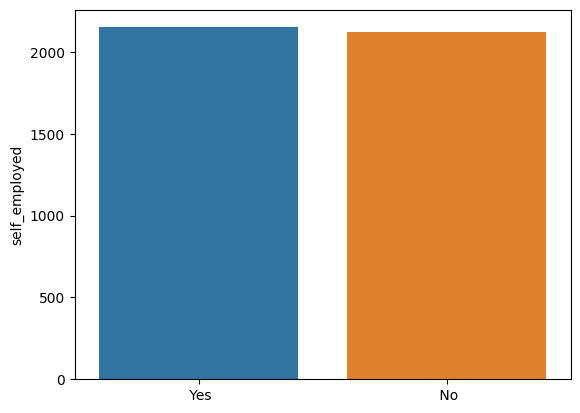

In [14]:
sns.barplot(x=df['self_employed'].value_counts().index,y=df['self_employed'].value_counts())

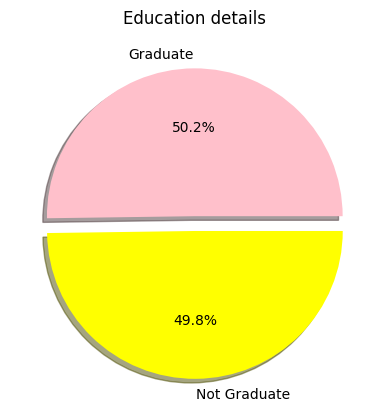

In [15]:
plt.pie(df['education'].value_counts(),[0,0.1],labels=['Graduate','Not Graduate'],autopct='%1.1f%%',shadow=True,colors=['pink','yellow'])
plt.title('Education details')
plt.show()

## Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])

In [19]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


## x and y split

In [20]:
y = df['loan_status']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [21]:
x = df.drop(columns = ['loan_status'],axis=1)
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


## Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
import joblib

In [23]:
scale = MinMaxScaler()

In [24]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_scaled.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.4,0.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,0.0,1.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490
2,0.6,0.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748
3,0.6,0.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415
4,1.0,1.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136


In [25]:
joblib.dump(scale,'scale_model.joblib')

['scale_model.joblib']

## Train test split

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [27]:
x_train.shape,y_train.shape

((2988, 11), (2988,))

In [28]:
x_test.shape,y_test.shape

((1281, 11), (1281,))

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred_lr = lr.predict(x_test)

### Evaluation

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
accuracy_score(y_test,y_pred_lr)

0.9110070257611241

In [35]:
pd.crosstab(y_test,y_pred_lr)

col_0,0,1
loan_status,,
0,752,58
1,56,415


In [36]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       810
           1       0.88      0.88      0.88       471

    accuracy                           0.91      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.91      0.91      0.91      1281



## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dec_tree = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [39]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
y_pred_dec_tree = dec_tree.predict(x_test)

### Evaluation

In [41]:
accuracy_score(y_test,y_pred_dec_tree)

0.9625292740046838

In [42]:
pd.crosstab(y_test,y_pred_dec_tree)

col_0,0,1
loan_status,,
0,809,1
1,47,424


In [43]:
print(classification_report(y_test,y_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       810
           1       1.00      0.90      0.95       471

    accuracy                           0.96      1281
   macro avg       0.97      0.95      0.96      1281
weighted avg       0.96      0.96      0.96      1281



## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rand_for = RandomForestClassifier(criterion='entropy')

In [46]:
rand_for.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [47]:
y_pred_rand_for = rand_for.predict(x_test)

### Evaluation

In [48]:
accuracy_score(y_test,y_pred_rand_for)

0.975800156128025

In [49]:
pd.crosstab(y_test,y_pred_rand_for)

col_0,0,1
loan_status,,
0,798,12
1,19,452


In [50]:
print(classification_report(y_test,y_pred_rand_for))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       810
           1       0.97      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.98      1281



## K-Nearest Neighbor

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
k_neigh = KNeighborsClassifier()

In [53]:
k_neigh.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred_k_neigh = k_neigh.predict(x_test)

### Evaluation

In [55]:
accuracy_score(y_test,y_pred_k_neigh)

0.8868071818891491

In [56]:
pd.crosstab(y_test,y_pred_k_neigh)

col_0,0,1
loan_status,,
0,721,89
1,56,415


In [57]:
print(classification_report(y_test,y_pred_k_neigh))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       810
           1       0.82      0.88      0.85       471

    accuracy                           0.89      1281
   macro avg       0.88      0.89      0.88      1281
weighted avg       0.89      0.89      0.89      1281



## Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb = GaussianNB()

In [60]:
nb.fit(x_train,y_train)

GaussianNB()

In [61]:
y_pred_nb = nb.predict(x_test)

### Evaluation

In [62]:
accuracy_score(y_test,y_pred_nb)

0.9328649492583919

In [63]:
pd.crosstab(y_test,y_pred_nb)

col_0,0,1
loan_status,,
0,753,57
1,29,442


In [64]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       810
           1       0.89      0.94      0.91       471

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281



## Support Vector Machine

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC()

In [67]:
svc.fit(x_train,y_train)

SVC()

In [68]:
y_pred_svc = svc.predict(x_test)

### Evaluation

In [69]:
accuracy_score(y_test,y_pred_svc)

0.9242779078844653

In [70]:
pd.crosstab(y_test,y_pred_svc)

col_0,0,1
loan_status,,
0,754,56
1,41,430


In [71]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       810
           1       0.88      0.91      0.90       471

    accuracy                           0.92      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.93      0.92      0.92      1281



## Conclusion

In [72]:
models = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','KNearest Neighbor','Naive Bayes','Support Vector Machine']
accuracy = [accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_dec_tree),accuracy_score(y_test,y_pred_rand_for),accuracy_score(y_test,y_pred_k_neigh),accuracy_score(y_test,y_pred_nb),accuracy_score(y_test,y_pred_svc)]

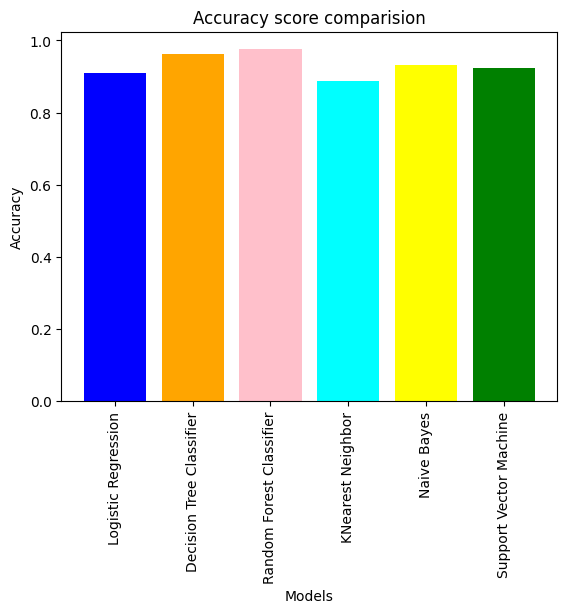

In [73]:
colors = ['blue','orange','pink','cyan','yellow','green']
plt.bar(models,accuracy,color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy score comparision')
plt.xticks(rotation='vertical')
plt.show()

### It can be concluded that the Random Forest Classifier is coming out to be one of the best model for this dataset, not only because it has the best accuracy score but also looking at its cross tab, we can see that it has small false positive as well as small false negative as compared to other models respecrively.

## Dumping the model

In [74]:
import pickle

In [75]:
with open('loan_model.pkl', 'wb') as model_file:
    pickle.dump(rand_for, model_file)